In [1]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.datasets

import sklearn

In [2]:
# Functions
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv

# Tools
from sklearn.model_selection import HalvingRandomSearchCV

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
X_final_train_images, X_final_test_images, y_final_train, y_final_test = train_test_split(train_images, train_labels, test_size=0.3, random_state=42)

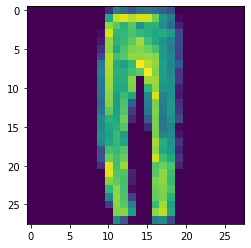

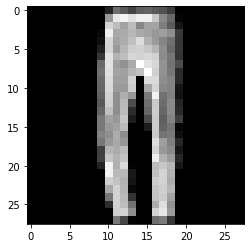

1


In [5]:
# origin
plt.imshow(X_final_train_images[0])
plt.show()

# grayscale 
plt.imshow(X_final_train_images[0], cmap='gray')
plt.show()

print(y_final_train[0])

def print_sample(img):
    plt.imshow(img, cmap='gray')
    plt.show()

In [6]:
X_train_images, X_test_images, y_train, y_test = train_test_split(X_final_train_images, y_final_train, test_size=0.3, random_state=11)

In [7]:
X_train = X_train_images.reshape(X_train_images.shape[0], 784)
X_test = X_test_images.reshape(X_test_images.shape[0], 784)

In [8]:
# Try first random forast
rfc = RandomForestClassifier(random_state=11)

rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)
# 87.43%

0.8743650793650793

In [117]:
X_train_images, X_test_images, y_train, y_test = train_test_split(X_final_train_images, y_final_train, test_size=0.7, random_state=11)
X_train_images, X_test_images, y_train, y_test = train_test_split(X_train_images, y_train, test_size=0.3, random_state=11)

print(len(X_train_images), ":", len(X_test_images))

8820 : 3780


In [29]:
X_train = X_train_images.reshape(X_train_images.shape[0], 784)
X_test = X_test_images.reshape(X_test_images.shape[0], 784)

In [30]:
# Try first random forast
rfc = RandomForestClassifier(random_state=11)

rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)
# 85.10% in 10 sec

0.8510582010582011

In [77]:
SEPERATES_COUNT = 5

seperates = np.linspace(0, 255, SEPERATES_COUNT).tolist()

X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

def add_seperates_sum(arr: np.array):
    for i in range(1, SEPERATES_COUNT):
        arr['sep_' + str(i)] = ((seperates[i-1] <= arr) & (arr <= seperates[i])).sum()
    
    return arr

X_train_df = X_train_df.apply(add_seperates_sum, axis=1)
X_test_df = X_test_df.apply(add_seperates_sum, axis=1)

In [78]:
rfc = RandomForestClassifier(random_state=11)

rfc.fit(X_train_df, y_train)

rfc.score(X_test_df, y_test)
# Not work

c:\users\omer2\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\omer2\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.8507936507936508

In [97]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

def add_seperates_sum(arr: np.array):
    arr['zero'] = (arr == 0).sum()

    return arr

X_train_df = X_train_df.apply(add_seperates_sum, axis=1)
X_test_df = X_test_df.apply(add_seperates_sum, axis=1)

In [96]:
rfc = RandomForestClassifier(random_state=11)

rfc.fit(X_train_df, y_train)

rfc.score(X_test_df, y_test)
# 85.47%

c:\users\omer2\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\omer2\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.8547619047619047

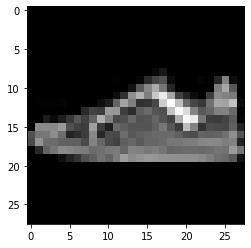

541
243


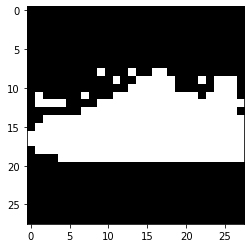

In [114]:
img = X_train_images[0]

print_sample(img)

print((img == 0).sum())
print((img != 0).sum())

img = ((img == 0) == False)
print_sample(img)

# 0   - is Black, background
# 255 - is White

In [125]:
# make it background and exists
# background - 0
# exists - 1

X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

def add_seperates_sum(arr: np.array):    
    arr = (arr != 0)
    return arr

X_train_df = X_train_df.apply(add_seperates_sum, axis=1)
X_test_df = X_test_df.apply(add_seperates_sum, axis=1)

rfc = RandomForestClassifier(random_state=11)

rfc.fit(X_train_df, y_train)

rfc.score(X_test_df, y_test)
# 85.87%

0.8587301587301587

In [201]:
# Try to remove the edges
def images_to_vectors(images):
    return images.reshape(images.shape[0], images.shape[1] * images.shape[2])

X_train_images2 = X_train_images.copy()
X_test_images2 = X_test_images.copy()

X_train_images2 = X_train_images2 != 0
X_test_images2 = X_test_images2 != 0

PANDING = 4

new_arr = list()
i = 0
for img in X_train_images2:
    img = img[PANDING:29-PANDING, PANDING:29-PANDING]
    new_arr.append(img.tolist())
    i += 1
    
X_train_images2 = np.array(new_arr)

new_arr = list()
i = 0
for img in X_test_images2:
    img = img[PANDING:29-PANDING, PANDING:29-PANDING]
    new_arr.append(img.tolist())
    i += 1

X_test_images2 = np.array(new_arr)
        
X_train_df = pd.DataFrame(images_to_vectors(X_train_images2))
X_test_df = pd.DataFrame(images_to_vectors(X_test_images2))

rfc = RandomForestClassifier(random_state=11)

rfc.fit(X_train_df, y_train)

rfc.score(X_test_df, y_test)
# 80.97%
# But is not good!

0.8097883597883598